## Proyecto 2: Clasificación 
#### Aprendizaje Automatico

### SoftMax Regression: IRIS DATASET


#### Librerías

In [422]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from scipy.sparse import csr_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import scipy.sparse
import seaborn as sns

### Dataset 


In [423]:
iris = datasets.load_iris()
X = iris["data"][::]
y = (iris["target"]).astype(int).reshape(len(iris.target),1)

In [424]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [425]:
def shuffleData(X, y):
   
    n = X.shape[1]
    data = np.c_[X, y]
    data = shuffle(data)
    
    return data[:,0:n], data[:,n:]

In [426]:
X_, y_ = shuffleData(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_,y_, test_size=0.5, random_state=55)

In [427]:
X_train = np.c_[np.ones((len(X_train),1)), X_train]
X_test = np.c_[np.ones((len(X_test),1)), X_test]

### Score $s_k(x)$

In [428]:
def score_x(x, theta):
    score=[]
    for i in range(theta.shape[1]):
        score.append(x @ theta[:,i])
    #score = x.T @ theta
    return score

### Funcion softmax

#         $\hat{p_k}=\frac{\exp(s_k(x))}{\sum_{j=1}^{K}{\exp(s_j(x))}}$

In [429]:
def softmaxfunction(s): 
    return np.exp(s)/np.sum(np.exp(s), axis = 0)

### Función Costo

In [430]:
def gradient_descend(X, y, epochs, eta):
    
   # X_b = np.c_[np.ones((len(y), 1)), X]
    m, n = X.shape
    theta = np.random.rand(n,1)
    
    for i in range(epochs):
        gradients = -(1/m) * (X_b.T @ (sigmoid(X_b @ theta) - y))
        theta = theta + eta*gradients
    
    return theta
    

In [431]:
def oneHotIt(Y):
    m = Y.shape[0]
    Y = Y.ravel()
    #Y = Y[:,0]
    OHX = scipy.sparse.csr_matrix((np.ones(m), (Y, np.array(range(m)))))
    OHX = np.array(OHX.todense()).T
    return OHX

In [432]:
def costo(theta,x,y):
    m = x.shape[0] #First we get the number of training examples
    y_mat = oneHotIt(y) #Next we convert the integer class coding into a one-hot representation
    scores = score_x(x,theta) #Then we compute raw class scores given our input and current weights
    prob = softmaxfunction(scores).T #Next we perform a softmax on these scores to get their probabilities
    loss = (-1 / m) * np.sum(y_mat * np.log(prob)) #+ (lam/2)*np.sum(thrta*theta) #We then find the loss of the probabilities
    grad = (-1 / m) * (x.T @ (y_mat - prob)) #+ lam*w #And compute the gradient for that loss
    return loss,grad

In [433]:
def getProbsAndPreds(someX):
    probs = softmaxfunction(score_x(someX, theta))
    preds = np.argmax(probs,axis=0)
    return probs,preds

In [434]:
theta = np.random.rand(X_train.shape[1],len(np.unique(y_train)))

In [435]:
eta = 0.9
n_epochs= 4000

losses = []
for i in range(0,n_epochs):
    loss,grad = costo(theta,X_train,y_train.astype(int))
    losses.append(loss)
    theta = theta - (eta * grad)
print (loss)

0.048169104116226324


In [436]:
theta

array([[ 0.07230523,  6.15896577, -4.58907189],
       [-2.0328948 ,  2.1458087 ,  1.23411776],
       [ 3.05730856, -0.04371058, -1.32971412],
       [-5.10685725, -0.83364806,  7.56511834],
       [-4.40901926, -1.78674075,  8.06964352]])

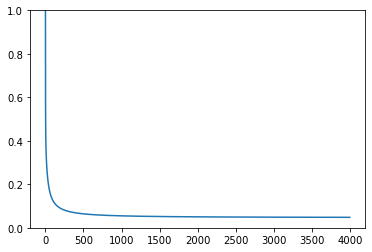

In [437]:
plt.plot(losses)
plt.ylim([0., 1])
plt.show()

In [438]:
def getAccuracy(someX,someY):
    prob,prede = getProbsAndPreds(someX)
    accuracy = sum(prede == someY)/(float(len(someY)))
    return accuracy

In [439]:
print ('Training Accuracy: ', getAccuracy(X_train,y_train))
print ('Test Accuracy: ', getAccuracy(X_test,y_test))

Training Accuracy:  [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333]
Test Accuracy:  [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.

In [440]:
len(X_train)

75

In [441]:
len(y_train)

75

In [442]:
theta.shape[1]

3

In [443]:
prob,prede = getProbsAndPreds(X_train)

In [444]:
prede

array([1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 1, 2, 0, 0, 2, 1,
       0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 0, 0, 0, 2, 0, 2, 1, 0, 1,
       2, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 2, 1, 2, 1, 1, 0, 1, 0, 2, 2, 2,
       1, 2, 2, 1, 0, 2, 2, 2, 1], dtype=int32)

In [445]:
y_train.ravel()

array([1., 0., 1., 1., 2., 0., 1., 2., 1., 1., 0., 2., 2., 2., 2., 2., 1.,
       2., 0., 0., 2., 2., 0., 0., 1., 1., 0., 1., 0., 2., 0., 0., 1., 2.,
       1., 0., 0., 0., 2., 0., 2., 1., 0., 1., 2., 0., 0., 0., 2., 0., 1.,
       1., 0., 1., 0., 2., 1., 2., 1., 1., 0., 1., 0., 2., 2., 2., 1., 2.,
       2., 1., 0., 2., 2., 1., 1.])

In [446]:
prob
prob.sum(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [447]:
theta

array([[ 0.07230523,  6.15896577, -4.58907189],
       [-2.0328948 ,  2.1458087 ,  1.23411776],
       [ 3.05730856, -0.04371058, -1.32971412],
       [-5.10685725, -0.83364806,  7.56511834],
       [-4.40901926, -1.78674075,  8.06964352]])

In [448]:
prob,prede = getProbsAndPreds(X_test)

In [449]:
prede

array([1, 0, 2, 2, 2, 0, 2, 1, 2, 0, 2, 2, 1, 0, 1, 2, 2, 2, 0, 0, 0, 2,
       0, 1, 1, 0, 1, 1, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 0, 2,
       0, 2, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       2, 2, 1, 2, 0, 0, 0, 1, 2], dtype=int32)

In [450]:
y_test.ravel()

array([1., 0., 2., 2., 2., 0., 2., 1., 2., 0., 2., 2., 1., 0., 1., 2., 2.,
       2., 0., 0., 0., 2., 0., 1., 1., 0., 1., 1., 2., 0., 0., 2., 2., 2.,
       0., 2., 2., 2., 1., 2., 1., 2., 0., 2., 0., 1., 1., 0., 0., 1., 1.,
       2., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 2., 1.,
       1., 2., 0., 0., 0., 1., 2.])

In [451]:
def error(original_target, predict_target):
    
   
    
    counter = 0.0
    
    for i in range(len(original_target)):
        if original_target[i] != predict_target[i]:
            counter += 1
            
    return counter/len(original_target)

In [452]:
error(y_test, prede)

0.02666666666666667

In [453]:
y_test[:5]

array([[1.],
       [0.],
       [2.],
       [2.],
       [2.]])

In [454]:
q = prede[:5]
q

array([1, 0, 2, 2, 2], dtype=int32)

In [455]:
q.reshape(-1, 1)

array([[1],
       [0],
       [2],
       [2],
       [2]], dtype=int32)

In [456]:
prede = prede.reshape(-1,1)

In [457]:
ex = error(y_test, prede)

In [458]:
print( 1-ex)

0.9733333333333334


In [459]:
len(y_train)

75

In [462]:
(y_test==prede).ravel()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True])